# About project

### We need to build a classification model based on the limited dataset for propensity to the product "**Consumer Credit**".
<br>

***Datasets***:<br>
`Clients` -- Clients<br>
`Transactions` -- Transactions<br>
<br>

***Description***:<br>

**Clients**<br>
`client_id` - Client ID<br>
`age` - Age<br>
`gender_code` - Gender<br>
`directory` - City<br>
`aMRG_eop` - Mortgage debt balance<br>
`aCSH_eop` - Consumer loan debt balance<br>
`aCRD_eop` - Credit card debt balance<br>
`pCUR_eop` - Current account balance<br>
`pCRD_eop` - Card account balance<br>
`pSAV_eop` - Savings account balance<br>
`pDEP_eop` - Deposit account balance<br>
`sWork_S` - Monthly salary<br>
`tPOS_S` - POS transaction amount<br>
<br>
**Transactions**<br>
`client_id` - Client ID<br>
`TRANSACTION_DT` - Transaction date<br>
`MCC_KIND_CD` - MCC type<br>
`MCC_CD` - MCC code<br>
`CARD_AMOUNT_EQV_CBR` - Transaction amount in Russian rubles<br>

# Data loading

In [39]:
import gdown

def download_from_google(id, save_as):
    gdown.download(f"https://drive.google.com/uc?id={id}", output=save_as, quiet=True)

In [40]:
download_from_google('1NSNd1GGbplxC36IJ6hfXvvo398jz-knV', '/content/Transactions.csv')
download_from_google('1KS3NIupNHli6rnj7zz5YgnEZCbf7Okee', '/content/Clients.csv')

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# reading datas
clients = pd.read_csv("/content/Clients.csv", delimiter=';')
transactions = pd.read_csv('/content/Transactions.csv', delimiter=';')

# Data preprocessing

## Clients

### Clean data

In [42]:
# Convert age to int
clients['age'] = clients['age'].astype(int)

# Replace commas with periods and convert to float
clients['aMRG_eop'] = clients['aMRG_eop'].str.replace(',', '.').astype(float)
clients['aCSH_eop'] = clients['aCSH_eop'].str.replace(',', '.').astype(float)

clients['aCRD_eop'] = clients['aCRD_eop'].str.replace(',', '.').astype(float)
clients['pCUR_eop'] = clients['pCUR_eop'].str.replace(',', '.').astype(float)

clients['pCRD_eop'] = clients['pCRD_eop'].str.replace(',', '.').astype(float)
clients['pSAV_eop'] = clients['pSAV_eop'].str.replace(',', '.').astype(float)

clients['pDEP_eop'] = clients['pDEP_eop'].str.replace(',', '.').astype(float)
clients['sWork_S'] = clients['sWork_S'].str.replace(',', '.').astype(float)
clients['tPOS_S'] = clients['tPOS_S'].str.replace(',', '.').astype(float)

In [43]:
num_obscl = clients.shape[0]
print(f"Number of Observations: {num_obscl}")
clients

Number of Observations: 1000


,client_id,age,gender_code,directory,aMRG_eop,aCSH_eop,aCRD_eop,pCUR_eop,pCRD_eop,pSAV_eop,pDEP_eop,sWork_S,tPOS_S
0,1,38,Ж,Санкт-Петербург,0.00,742601.31,0.0,0.00,166353.83,0.00,0.0,286133.38,114454.28
1,2,38,Ж,Нижний Новгород,0.00,250000.00,540.0,0.00,372.19,0.00,0.0,107920.36,92437.27
2,3,37,Ж,Нижний Новгород,0.00,247232.80,0.0,0.00,89735.56,0.00,0.0,88649.15,73698.68
3,4,37,М,Нижний Новгород,0.00,1195448.42,0.0,0.00,314498.64,0.00,0.0,198273.64,133039.22
4,5,58,М,Нижний Новгород,5045174.72,0.00,0.0,0.81,179383.40,0.00,0.0,158434.28,54120.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,48,Ж,Новый Уренгой,0.00,1000000.00,0.0,1500000.00,243169.83,263298.50,0.0,117428.00,90782.05
996,997,51,М,Новый Уренгой,469532.28,0.00,0.0,0.00,70391.45,351.08,0.0,205222.71,83319.15
997,998,49,М,Тюмень,0.00,1204003.78,0.0,45.00,56496.65,0.00,0.0,137305.88,165253.09
998,999,45,Ж,Сургут,0.00,655645.42,0.0,43.45,89718.27,0.00,380000.0,97142.73,216913.16


In [44]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender_code  1000 non-null   object 
 3   directory    1000 non-null   object 
 4   aMRG_eop     1000 non-null   float64
 5   aCSH_eop     1000 non-null   float64
 6   aCRD_eop     1000 non-null   float64
 7   pCUR_eop     1000 non-null   float64
 8   pCRD_eop     1000 non-null   float64
 9   pSAV_eop     1000 non-null   float64
 10  pDEP_eop     1000 non-null   float64
 11  sWork_S      1000 non-null   float64
 12  tPOS_S       1000 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 101.7+ KB


In [45]:
display(clients)

,client_id,age,gender_code,directory,aMRG_eop,aCSH_eop,aCRD_eop,pCUR_eop,pCRD_eop,pSAV_eop,pDEP_eop,sWork_S,tPOS_S
0,1,38,Ж,Санкт-Петербург,0.00,742601.31,0.0,0.00,166353.83,0.00,0.0,286133.38,114454.28
1,2,38,Ж,Нижний Новгород,0.00,250000.00,540.0,0.00,372.19,0.00,0.0,107920.36,92437.27
2,3,37,Ж,Нижний Новгород,0.00,247232.80,0.0,0.00,89735.56,0.00,0.0,88649.15,73698.68
3,4,37,М,Нижний Новгород,0.00,1195448.42,0.0,0.00,314498.64,0.00,0.0,198273.64,133039.22
4,5,58,М,Нижний Новгород,5045174.72,0.00,0.0,0.81,179383.40,0.00,0.0,158434.28,54120.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,48,Ж,Новый Уренгой,0.00,1000000.00,0.0,1500000.00,243169.83,263298.50,0.0,117428.00,90782.05
996,997,51,М,Новый Уренгой,469532.28,0.00,0.0,0.00,70391.45,351.08,0.0,205222.71,83319.15
997,998,49,М,Тюмень,0.00,1204003.78,0.0,45.00,56496.65,0.00,0.0,137305.88,165253.09
998,999,45,Ж,Сургут,0.00,655645.42,0.0,43.45,89718.27,0.00,380000.0,97142.73,216913.16


## Transactions

### Clean data

In [46]:
import pandas as pd

# Convert TRANSACTION_DT to datetime
transactions['TRANSACTION_DT'] = pd.to_datetime(transactions['TRANSACTION_DT'])

# Convert MCC_CD to float
transactions['MCC_CD'] = transactions['MCC_CD'].astype(float)

# Replace commas with periods and convert CARD_AMOUNT_EQV_CBR to float
transactions['CARD_AMOUNT_EQV_CBR'] = transactions['CARD_AMOUNT_EQV_CBR'].str.replace(',', '.').astype(float)


<ipython-input-46-8a9415238e83>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  transactions['TRANSACTION_DT'] = pd.to_datetime(transactions['TRANSACTION_DT'])


In [47]:
num_obstr = transactions.shape[0]
print(f"Number of Observations: {num_obstr}")
transactions

Number of Observations: 77666


,client_id,TRANSACTION_DT,MCC_KIND_CD,MCC_CD,CARD_AMOUNT_EQV_CBR
0,1,2020-01-09,Розничные магазины,5411.0,51.64
1,1,2020-01-09,Различные магазины,5921.0,722.30
2,1,2020-01-09,Розничные магазины,5411.0,769.27
3,1,2020-05-09,Розничные магазины,5411.0,5.90
4,1,2020-05-09,Личные услуги,7230.0,209.00
...,...,...,...,...,...
77661,1000,2020-09-28,Розничные магазины,5411.0,200.96
77662,1000,2020-09-28,Магазины одежды,5651.0,585.00
77663,1000,2020-09-29,Розничные магазины,5331.0,331.17
77664,1000,2020-09-29,Розничные магазины,5411.0,658.00


In [48]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77666 entries, 0 to 77665
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   client_id            77666 non-null  int64         
 1   TRANSACTION_DT       77666 non-null  datetime64[ns]
 2   MCC_KIND_CD          77439 non-null  object        
 3   MCC_CD               77466 non-null  float64       
 4   CARD_AMOUNT_EQV_CBR  77666 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.0+ MB


В данной таблице есть пропуски. Отобразим их:

In [49]:
# Finding all the missings
transactions[transactions.isna().any(axis=1)]

,client_id,TRANSACTION_DT,MCC_KIND_CD,MCC_CD,CARD_AMOUNT_EQV_CBR
397,6,2020-09-19,NaN,NaN,1365.36
971,14,2020-02-09,NaN,NaN,59.00
1006,15,2020-01-09,NaN,NaN,3840.66
1083,16,2020-02-09,NaN,NaN,59.00
1213,19,2020-09-28,NaN,NaN,340599.00
...,...,...,...,...,...
76606,986,2020-09-23,NaN,NaN,54000.00
76680,987,2020-09-23,NaN,NaN,225000.00
76894,990,2020-01-09,NaN,742.0,4264.00
76915,990,2020-04-09,NaN,742.0,400.00


In [50]:
# Checking MCC_CD and MCC_KIND_CD
desired_mcc_cd = 742.0
transactions[transactions['MCC_CD'] == desired_mcc_cd]

,client_id,TRANSACTION_DT,MCC_KIND_CD,MCC_CD,CARD_AMOUNT_EQV_CBR
2217,33,2020-02-09,NaN,742.0,2405.0
4243,58,2020-09-14,Контрактные услуги,742.0,3028.0
4530,64,2020-02-09,NaN,742.0,172.0
8208,113,2020-09-22,Контрактные услуги,742.0,2079.0
9193,127,2020-02-09,NaN,742.0,2600.0
9205,127,2020-08-09,NaN,742.0,500.0
11979,162,2020-09-22,Контрактные услуги,742.0,4000.0
13660,185,2020-09-14,Контрактные услуги,742.0,1200.0
13661,185,2020-09-14,Контрактные услуги,742.0,2000.0
13664,185,2020-09-15,Контрактные услуги,742.0,1230.0


In [51]:
# Check for missing values
missing_values = transactions.isnull().sum()
print(missing_values)
# We have only 27 rows which have MCC_CD but not have MCC_KIND_CD, so it is not very significant and will not have much cause on result, so we can just drop it
transactions = transactions.dropna()

client_id                0
TRANSACTION_DT           0
MCC_KIND_CD            227
MCC_CD                 200
CARD_AMOUNT_EQV_CBR      0
dtype: int64


# Data merging

In [52]:
# merging
df_merged = pd.merge(clients, transactions, on='client_id', how='inner')

In [53]:
num_obsdata = df_merged.shape[0]
print(f"Number of Observations: {num_obsdata}")
df_merged.head(5)

Number of Observations: 77439


,client_id,age,gender_code,directory,aMRG_eop,aCSH_eop,aCRD_eop,pCUR_eop,pCRD_eop,pSAV_eop,pDEP_eop,sWork_S,tPOS_S,TRANSACTION_DT,MCC_KIND_CD,MCC_CD,CARD_AMOUNT_EQV_CBR
0,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-01-09,Розничные магазины,5411.0,51.64
1,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-01-09,Различные магазины,5921.0,722.30
2,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-01-09,Розничные магазины,5411.0,769.27
3,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-05-09,Розничные магазины,5411.0,5.90
4,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-05-09,Личные услуги,7230.0,209.00


In [54]:
# Mapping gender_code to gnd_num
df_merged['gnd_num'] = df_merged['gender_code'].apply(lambda x: 2 if x == 'Ж' else 1 if x == 'М' else None)

In [55]:
# Dictionary to map the values
dir_mapping = {
    'Москва': 1,
    'Санкт-Петербург': 2,
    'Нижний Новгород': 3,
    'Казань': 4,
    'Томск': 5,
    'Ростов-на-Дону': 6,
    'Астрахань': 7,
    'Краснодар': 8,
    'Ставрополь': 9,
    'Тула': 10,
    'Воронеж': 11,
    'Новый Уренгой': 12,
    'Южно-Сахалинск': 13,
    'Югорск': 14,
    'Красноярск': 15,
    'Калининград': 16,
    'Пермь': 17,
    'Волгоград': 18,
    'ДРБЦР': 19,
    'Сургут': 20,
    'Екатеринбург': 21,
    'Благовещенск': 22,
    'Владивосток': 23,
    'Центральный': 24,
    'Новосибирск': 25,
    'Тюмень': 26,
    'Уфа': 27,
    'Самара': 28,
    'Кемерово': 29,
    'Якутск': 30,
    'Хабаровск': 31
}

# Mapping directory to dir_num
df_merged['dir_num'] = df_merged['directory'].map(dir_mapping)

In [56]:
# Dictionary to map the values
kind_mapping = {
    'Авиалинии, авиакомпании': 1,
    'Автомобили и транспортные средства': 2,
    'Аренда автомобилей': 3,
    'Бизнес услуги': 4,
    'Государственные услуги': 5,
    'Коммунальные и кабельные услуги': 6,
    'Контрактные услуги': 7,
    'Личные услуги': 8,
    'Магазины одежды': 9,
    'Оптовые поставщики и производители': 10,
    'Отели и мотели': 11,
    'Продажи по почте/телефону': 12,
    'Профессиональные услуги': 13,
    'Развлечения': 14,
    'Различные магазины': 15,
    'Розничные магазины': 16,
    'Строительные магазины': 17,
    'Транспортные услуги': 18,
    'Финансовые услуги': 19,
    'Членские взносы': 20,
}

# Map directory to dir_num
df_merged['trkind_num'] = df_merged['MCC_KIND_CD'].map(kind_mapping)

In [57]:
num_obsdt = df_merged.shape[0]

print(f"Number of Observations: {num_obsdt}")

df_merged.head(5)

Number of Observations: 77439


,client_id,age,gender_code,directory,aMRG_eop,aCSH_eop,aCRD_eop,pCUR_eop,pCRD_eop,pSAV_eop,pDEP_eop,sWork_S,tPOS_S,TRANSACTION_DT,MCC_KIND_CD,MCC_CD,CARD_AMOUNT_EQV_CBR,gnd_num,dir_num,trkind_num
0,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-01-09,Розничные магазины,5411.0,51.64,2,2,16
1,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-01-09,Различные магазины,5921.0,722.30,2,2,15
2,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-01-09,Розничные магазины,5411.0,769.27,2,2,16
3,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-05-09,Розничные магазины,5411.0,5.90,2,2,16
4,1,38,Ж,Санкт-Петербург,0.0,742601.31,0.0,0.0,166353.83,0.0,0.0,286133.38,114454.28,2020-05-09,Личные услуги,7230.0,209.00,2,2,8


Features engineering

Here we can go by two ways, first one is already done, merging these two datasets and working in merged one. Second version is to calculate descriptive statistics on transactions data and construct one to one merge as we are mostly interested in credit and not transactions itself.

As we don't have concreat information about date in clients dataset, here we consider that transaction dataset's date is showing the period, when clients dataset was collected.

For both ways we are using aCSH_eop for creating target variable.
aCSH_eop is showing loan balance, but here we consider, that if aCSH_eop = 0, then client have no Consumer Credit(of course client could take credit and then pay it and in that case loan would be 0, but in this dataset we do not have any other variable, which shows more concreat information about consumer credit).

First way

In [58]:
# Setting threshold
threshold = 0.0

# Creating target variable
df_merged[df_merged['aCSH_eop'] > threshold]
df_merged['Target'] = (df_merged['aCSH_eop'] > threshold).astype('int8')
#display(df_merged)

In [59]:
scaler_std = StandardScaler()
feat_std = ['aMRG_eop', 'aCRD_eop', 'pCUR_eop', 'pCRD_eop', 'pSAV_eop', 'pDEP_eop', 'sWork_S', 'tPOS_S', 'CARD_AMOUNT_EQV_CBR']
df_merged[feat_std] = scaler_std.fit_transform(df_merged[feat_std])
#display(df_merged)

In [60]:
# Extract date and leave only day, as month and year are the same for all observations
df_merged['tr_date'] = pd.to_datetime(df_merged['TRANSACTION_DT'])
df_merged['tr_day'] = df_merged['tr_date'].dt.day


In [61]:
# Create new features from transactions
tr_summary = df_merged.groupby('client_id')['CARD_AMOUNT_EQV_CBR'].agg(['mean', 'count']).reset_index()
tr_summary.columns = ['client_id', 'avg_tr', 'tr_count']
df_merged = pd.merge(df_merged, tr_summary, on='client_id', how='left')

In [62]:
# Applying minmax scale for age and day
scaler_mnx = MinMaxScaler()
age_values = df_merged['age'].values.reshape(-1, 1)
tr_day_values = df_merged['tr_day'].values.reshape(-1, 1)

df_merged['age_sc'] = scaler_mnx.fit_transform(age_values)
df_merged['tr_day_sc'] = scaler_mnx.fit_transform(tr_day_values)

#grouping age
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df_merged['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=False)
#display(df_merged)

In [63]:
# Dropping not needed variables
df_merged.drop(columns=['tr_date', 'TRANSACTION_DT', 'aCSH_eop'])

,client_id,age,gender_code,directory,aMRG_eop,aCRD_eop,pCUR_eop,pCRD_eop,pSAV_eop,pDEP_eop,...,gnd_num,dir_num,trkind_num,Target,tr_day,avg_tr,tr_count,age_sc,tr_day_sc,age_group
0,1,38,Ж,Санкт-Петербург,-0.446187,-0.470519,-0.130251,0.059274,-0.206682,-0.161651,...,2,2,16,1,9,0.090168,45,0.333333,0.000000,36-45
1,1,38,Ж,Санкт-Петербург,-0.446187,-0.470519,-0.130251,0.059274,-0.206682,-0.161651,...,2,2,15,1,9,0.090168,45,0.333333,0.000000,36-45
2,1,38,Ж,Санкт-Петербург,-0.446187,-0.470519,-0.130251,0.059274,-0.206682,-0.161651,...,2,2,16,1,9,0.090168,45,0.333333,0.000000,36-45
3,1,38,Ж,Санкт-Петербург,-0.446187,-0.470519,-0.130251,0.059274,-0.206682,-0.161651,...,2,2,16,1,9,0.090168,45,0.333333,0.000000,36-45
4,1,38,Ж,Санкт-Петербург,-0.446187,-0.470519,-0.130251,0.059274,-0.206682,-0.161651,...,2,2,8,1,9,0.090168,45,0.333333,0.000000,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77434,1000,36,Ж,Тюмень,0.072053,-0.470519,-0.127547,-0.307481,-0.206682,-0.161651,...,2,26,16,0,28,-0.012433,47,0.285714,0.904762,36-45
77435,1000,36,Ж,Тюмень,0.072053,-0.470519,-0.127547,-0.307481,-0.206682,-0.161651,...,2,26,9,0,28,-0.012433,47,0.285714,0.904762,36-45
77436,1000,36,Ж,Тюмень,0.072053,-0.470519,-0.127547,-0.307481,-0.206682,-0.161651,...,2,26,16,0,29,-0.012433,47,0.285714,0.952381,36-45
77437,1000,36,Ж,Тюмень,0.072053,-0.470519,-0.127547,-0.307481,-0.206682,-0.161651,...,2,26,16,0,29,-0.012433,47,0.285714,0.952381,36-45


In [65]:
# Check the uniqueness of combinations of MCC_KIND_CD and MCC_CD
uniq_comb = df_merged.groupby(['MCC_KIND_CD', 'MCC_CD']).size().reset_index(name='count')
nuniq_comb = uniq_comb[uniq_comb['count'] > 1]

# Print the non-unique combinations
print("Non-unique combinations of MCC_KIND_CD and MCC_CD:")
print(nuniq_comb)
#As we could see here, MCC_KIND_CD and MCC_CD are not in one to one correspondance, so we need to keep both of them

Non-unique combinations of MCC_KIND_CD and MCC_CD:
                            MCC_KIND_CD  MCC_CD  count
0               Авиалинии, авиакомпании  3011.0     65
1               Авиалинии, авиакомпании  3026.0      2
4               Авиалинии, авиакомпании  3246.0      2
5    Автомобили и транспортные средства  5511.0     56
6    Автомобили и транспортные средства  5521.0     11
..                                  ...     ...    ...
230                   Финансовые услуги  6513.0     19
232                   Финансовые услуги  7032.0     10
233                     Членские взносы  8398.0     36
234                     Членские взносы  8641.0      9
235                     Членские взносы  8661.0     10

[211 rows x 3 columns]


In [66]:
# One-Hot encoding for directory
print(df_merged['directory'].nunique())
df_merged['directory'].unique()

31


array(['Санкт-Петербург', 'Нижний Новгород', 'Новый Уренгой', 'Казань',
       'Москва', 'Тула', 'Воронеж', 'Краснодар', 'Ставрополь',
       'Красноярск', 'Калининград', 'Пермь', 'Ростов-на-Дону',
       'Южно-Сахалинск', 'Югорск', 'Томск', 'Самара', 'Волгоград',
       'ДРБЦР', 'Сургут', 'Екатеринбург', 'Тюмень', 'Центральный',
       'Астрахань', 'Новосибирск', 'Уфа', 'Якутск', 'Благовещенск',
       'Хабаровск', 'Кемерово', 'Владивосток'], dtype=object)

In [67]:
df_merged = pd.get_dummies(df_merged, columns=['dir_num', ])
df_merged

,client_id,age,gender_code,directory,aMRG_eop,aCSH_eop,aCRD_eop,pCUR_eop,pCRD_eop,pSAV_eop,...,dir_num_22,dir_num_23,dir_num_24,dir_num_25,dir_num_26,dir_num_27,dir_num_28,dir_num_29,dir_num_30,dir_num_31
0,1,38,Ж,Санкт-Петербург,-0.446187,742601.31,-0.470519,-0.130251,0.059274,-0.206682,...,0,0,0,0,0,0,0,0,0,0
1,1,38,Ж,Санкт-Петербург,-0.446187,742601.31,-0.470519,-0.130251,0.059274,-0.206682,...,0,0,0,0,0,0,0,0,0,0
2,1,38,Ж,Санкт-Петербург,-0.446187,742601.31,-0.470519,-0.130251,0.059274,-0.206682,...,0,0,0,0,0,0,0,0,0,0
3,1,38,Ж,Санкт-Петербург,-0.446187,742601.31,-0.470519,-0.130251,0.059274,-0.206682,...,0,0,0,0,0,0,0,0,0,0
4,1,38,Ж,Санкт-Петербург,-0.446187,742601.31,-0.470519,-0.130251,0.059274,-0.206682,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77434,1000,36,Ж,Тюмень,0.072053,0.00,-0.470519,-0.127547,-0.307481,-0.206682,...,0,0,0,0,1,0,0,0,0,0
77435,1000,36,Ж,Тюмень,0.072053,0.00,-0.470519,-0.127547,-0.307481,-0.206682,...,0,0,0,0,1,0,0,0,0,0
77436,1000,36,Ж,Тюмень,0.072053,0.00,-0.470519,-0.127547,-0.307481,-0.206682,...,0,0,0,0,1,0,0,0,0,0
77437,1000,36,Ж,Тюмень,0.072053,0.00,-0.470519,-0.127547,-0.307481,-0.206682,...,0,0,0,0,1,0,0,0,0,0


Second way

In [68]:
# Scaling CARD_AMOUNT_EQV_CBR

amnt_values = transactions['CARD_AMOUNT_EQV_CBR'].values.reshape(-1, 1)
transactions['CARD_AMOUNT_sc'] = scaler_std.fit_transform(amnt_values)

<ipython-input-68-95bd6e65ea05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['CARD_AMOUNT_sc'] = scaler_std.fit_transform(amnt_values)


In [69]:
tr_summary = transactions.groupby('client_id')['CARD_AMOUNT_sc'].agg(['mean', 'count', 'min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).reset_index()

# Renameing the columns
tr_summary.columns = ['client_id', 'avg_tr', 'tr_count', 'min_tr', 'max_tr', 'median_tr', 'q1_tr', 'q3_tr']

# One to one merge with clients dataset
df_1mrg = pd.merge(clients, tr_summary, on='client_id', how='left')
#display(df_1mrg)

In [70]:
# Scaling for other features

feat_std_1 = ['aMRG_eop', 'aCRD_eop', 'pCUR_eop', 'pCRD_eop', 'pSAV_eop', 'pDEP_eop', 'sWork_S', 'tPOS_S']
df_1mrg[feat_std_1] = scaler_std.fit_transform(df_1mrg[feat_std_1])

age_val = df_1mrg['age'].values.reshape(-1, 1)
df_1mrg['age_sc'] = scaler_mnx.fit_transform(age_val)

#grouping age
df_1mrg['age_group'] = pd.cut(df_1mrg['age'], bins=bins, labels=labels, right=False)
#display(df_1mrg)

In [72]:
# Creating target variable
df_1mrg[df_1mrg['aCSH_eop'] > threshold]
df_1mrg['Target'] = (df_1mrg['aCSH_eop'] > threshold).astype('int8')
df_1mrg.drop(columns=['aCSH_eop'])

,client_id,age,gender_code,directory,aMRG_eop,aCRD_eop,pCUR_eop,pCRD_eop,pSAV_eop,pDEP_eop,...,avg_tr,tr_count,min_tr,max_tr,median_tr,q1_tr,q3_tr,age_sc,age_group,Target
0,1,38,Ж,Санкт-Петербург,-0.426867,-0.463454,-0.102920,0.039430,-0.203365,-0.164058,...,0.090168,45,-0.183767,6.620974,-0.135825,-0.168966,-0.071690,0.333333,36-45,1
1,2,38,Ж,Нижний Новгород,-0.426867,-0.458811,-0.102920,-0.416969,-0.203365,-0.164058,...,0.019248,49,-0.184080,3.982595,-0.117108,-0.160546,-0.030246,0.333333,36-45,1
2,3,37,Ж,Нижний Новгород,-0.426867,-0.463454,-0.102920,-0.171247,-0.203365,-0.164058,...,-0.096003,90,-0.181597,0.624922,-0.142302,-0.163498,-0.055308,0.309524,36-45,1
3,4,37,М,Нижний Новгород,-0.426867,-0.463454,-0.102920,0.446784,-0.203365,-0.164058,...,-0.077224,134,-0.184377,3.053117,-0.135825,-0.161302,-0.100848,0.309524,36-45,1
4,5,58,М,Нижний Новгород,1.228289,-0.463454,-0.102919,0.075258,-0.203365,-0.164058,...,0.050329,27,-0.150344,1.384050,-0.019343,-0.118865,0.072795,0.809524,56-65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,48,Ж,Новый Уренгой,-0.426867,-0.463454,2.585413,0.250651,0.279535,-0.164058,...,-0.023744,61,-0.180733,2.935334,-0.117365,-0.142302,-0.049095,0.571429,46-55,1
996,997,51,М,Новый Уренгой,-0.272829,-0.463454,-0.102920,-0.224437,-0.202721,-0.164058,...,-0.041633,63,-0.182925,4.833267,-0.161410,-0.170572,-0.105031,0.642857,46-55,0
997,998,49,М,Тюмень,-0.426867,-0.463454,-0.102839,-0.262644,-0.203365,-0.164058,...,1.007293,1,1.007293,1.007293,1.007293,1.007293,1.007293,0.595238,46-55,1
998,999,45,Ж,Сургут,-0.426867,-0.463454,-0.102842,-0.171294,-0.203365,0.098055,...,0.081693,88,-0.182245,3.493178,-0.088460,-0.158954,0.017604,0.500000,46-55,1


In [73]:
df_1mrg['dir_num'] = pd.factorize(df_1mrg['directory'])[0]

In [74]:
df_1mrg = pd.get_dummies(df_1mrg, columns=['dir_num', ])
#display(df_1mrg)

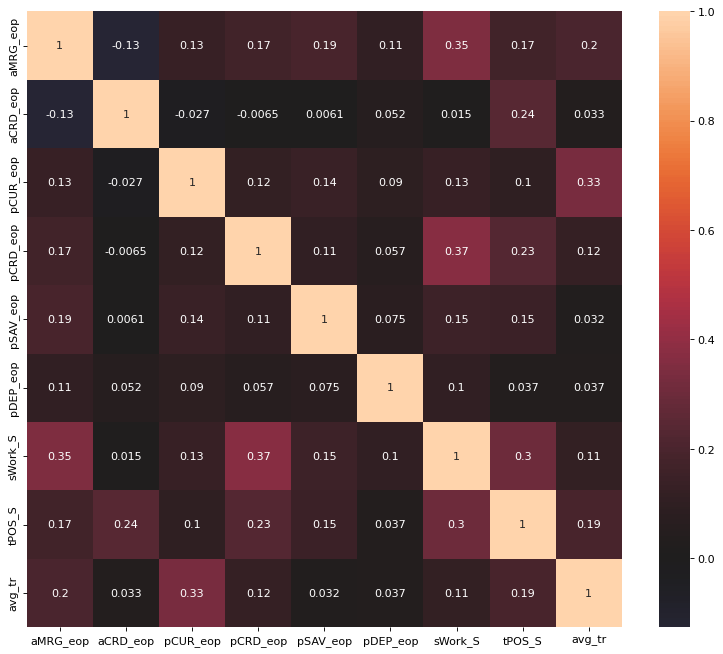

In [79]:
selected_columns = ['aMRG_eop', 'aCRD_eop', 'pCUR_eop', 'pCRD_eop', 'pSAV_eop', 'pDEP_eop', 'sWork_S', 'tPOS_S', 'avg_tr']
corr = df_1mrg[selected_columns].corr()

# Create the heatmap
plt.figure(figsize=(12, 10), dpi=80)
heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0, annot=True)
plt.show()
heatmap.get_figure().savefig("corr.png")

In [80]:
# Creating ratio variables
df_1mrg['rat_crd_sal'] = df_1mrg['pCRD_eop']/df_1mrg['sWork_S'] # account balance to salary
df_1mrg['rat_mrg_sal'] = df_1mrg['aMRG_eop']/df_1mrg['sWork_S'] # mortgage debt to salary
df_1mrg['rat_trs_sal'] = df_1mrg['avg_tr']/df_1mrg['sWork_S'] # transactions to salary
df_1mrg['rat_crd_trs'] = df_1mrg['aCRD_eop']/df_1mrg['tPOS_S'] # credit card balance to overall transactions